In [1]:
# Import packages
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

/Users/supeng-wen/miniconda2/envs/cp1/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# File path
food_business_file = 'Dataset/food_business.csv'

In [3]:
# Read in data as DataFrame
food_business = pd.read_csv(food_business_file)

In [4]:
# Overall info
display(food_business.info())
display(food_business.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33289 entries, 0 to 33288
Data columns (total 10 columns):
business_id     33289 non-null object
name            33289 non-null object
attributes      32589 non-null object
city            33289 non-null object
state           33289 non-null object
categories      33289 non-null object
stars           33289 non-null float64
review_count    33289 non-null int64
postal_code     33199 non-null float64
population      33289 non-null int64
dtypes: float64(2), int64(2), object(6)
memory usage: 2.5+ MB


None

,stars,review_count,postal_code,population
count,33289.000000,33289.000000,33199.000000,3.328900e+04
mean,3.509943,84.590105,62290.279195,4.716956e+05
std,0.868808,198.634857,27892.847155,4.865512e+05
min,1.000000,3.000000,12919.000000,2.280000e+02
25%,3.000000,9.000000,44012.000000,5.621200e+04
50%,3.500000,27.000000,85016.000000,3.024070e+05
75%,4.000000,81.000000,85326.000000,6.416760e+05
max,5.000000,7968.000000,97535.000000,1.626078e+06


## How many food businesses are greater or equal to 4 stars?

In [5]:
# Get the number of food businesses with stars rating gearter or equal to 4
fournabove = food_business.loc[food_business.stars >= 4].business_id.count()
print("There are %s food businesses greater or equal to 4 stars"%(fournabove))
# Get the percentage of 4 stars and above food businesses among all food businesses
percentage = (fournabove*100)/food_business.business_id.count()
print("About %s percent of food businesses are greater or equal to 4 stars" % (percentage))

There are 14682 food businesses greater or equal to 4 stars
About 44 percent of food businesses are greater or equal to 4 stars


## What's the stars rating distribution?

In [6]:
# Stars distribution in table
display(food_business.groupby('stars').business_id.count())

stars
1.0     269
1.5     820
2.0    2033
2.5    3345
3.0    5124
3.5    7016
4.0    7983
4.5    4880
5.0    1819
Name: business_id, dtype: int64

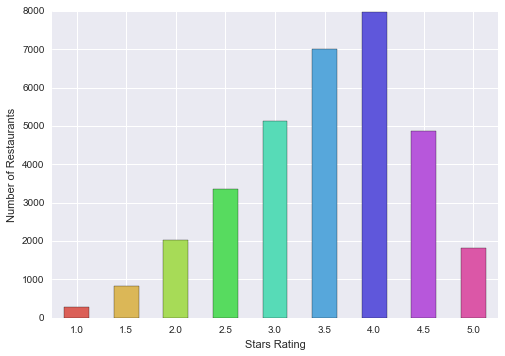

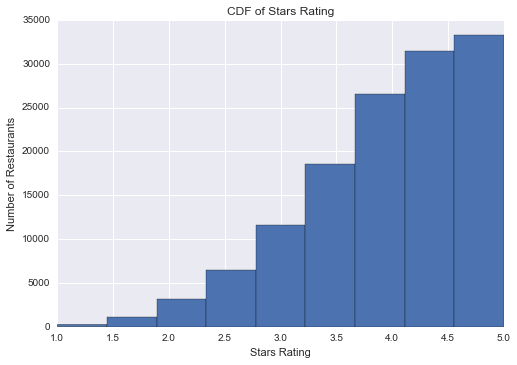

In [29]:
# Stars distribution graphs
# Bar plot
# Set color for the bar plot
color = sns.color_palette('hls',9)
food_business.groupby('stars').business_id.count().plot.bar(color=color)
_ = plt.xlabel('Stars Rating')
_ = plt.ylabel('Number of Restaurants')
_ = plt.xticks(rotation='horizontal')
plt.show()
# Plot CDF
food_business.stars.plot.hist(by='business_id', cumulative=True, bins=9)
_ = plt.xlabel('Stars Rating')
_ = plt.ylabel('Number of Restaurants')
_ = plt.title('CDF of Stars Rating')
plt.show()

## What's the review count distribution?

In [8]:
# Review count distribution
display(food_business.groupby('review_count').business_id.count())
print("The average of review count is %.2f" % (food_business['review_count'].mean()))
# Get the 50th and 75th percentile of review count: percentile
percentile = np.percentile(food_business.review_count,[50,75])
print("The median is %.2f and the 75th percentile is %.2f" % (percentile[0], percentile[1]))

review_count
3       2182
4       1486
5       1314
6       1134
7        937
8        854
9        781
10       768
11       630
12       560
13       567
14       566
15       556
16       462
17       473
18       409
19       391
20       435
21       378
22       351
23       346
24       346
25       336
26       316
27       294
28       298
29       264
30       257
31       269
32       255
        ... 
2313       1
2499       1
2523       1
2596       1
2617       1
2670       1
2735       1
2850       1
2880       1
2887       1
2909       1
2937       1
3003       1
3025       1
3048       1
3160       1
3193       1
3244       1
3250       1
3730       1
3731       1
3743       1
4078       1
4091       1
4240       1
4981       1
5382       1
6446       1
7866       1
7968       1
Name: business_id, Length: 1046, dtype: int64

The average of review count is 84.59
The median is 27.00 and the 75th percentile is 81.00


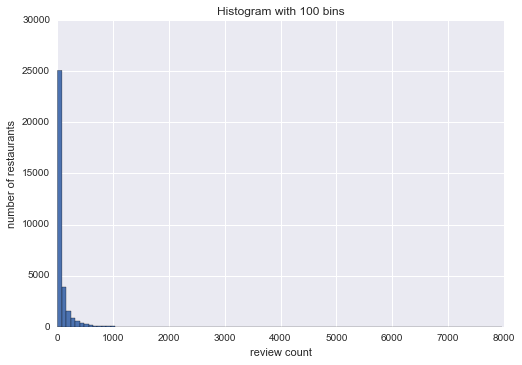

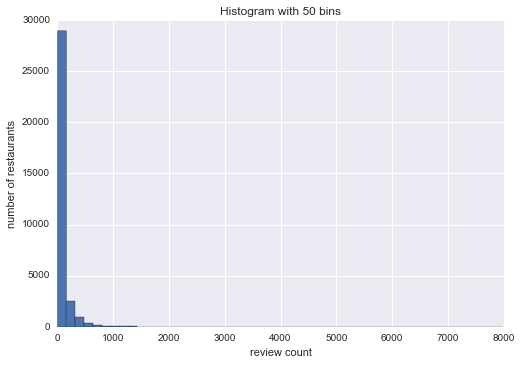

In [9]:
# Review count graph
# Plot histogram with 100 bins
food_business.review_count.plot.hist(by='business_id', bins=100)
_ = plt.xlabel('review count')
_ = plt.ylabel('number of restaurants')
_ = plt.title('Histogram with 100 bins')
plt.show()
# Plot histogram with 50 bins
food_business.review_count.plot.hist(by='business_id', bins=50)
_ = plt.xlabel('review count')
_ = plt.ylabel('number of restaurants')
_ = plt.title('Histogram with 50 bins')
plt.show()

## What's the distribution like if review count less than 100?

count    26231.000000
mean        26.520072
std         24.632035
min          3.000000
25%          7.000000
50%         17.000000
75%         39.000000
max         99.000000
Name: review_count, dtype: float64

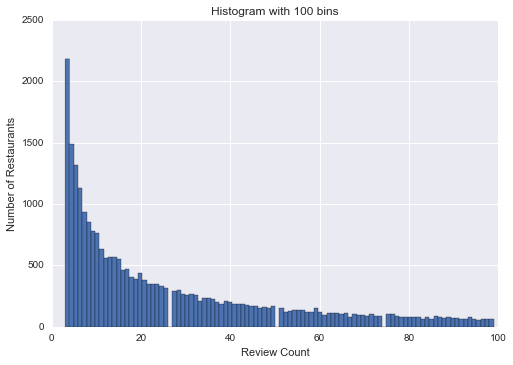

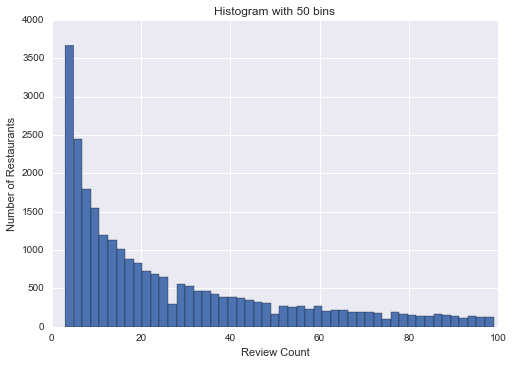

In [10]:
# Get the dataset with review count less than 100: less_hund
less_hund = food_business.loc[food_business['review_count'] < 100]
display(less_hund.review_count.describe())
# Plot histogram with 100 bins
_ = less_hund['review_count'].plot.hist(by='business_id',bins=100)
_ = plt.xlabel('Review Count')
_ = plt.ylabel('Number of Restaurants')
_ = plt.title('Histogram with 100 bins')
plt.show()
# Plot histogram with 50 bins
_ = less_hund['review_count'].plot.hist(by='business_id',bins=50)
_ = plt.xlabel('Review Count')
_ = plt.ylabel('Number of Restaurants')
_ = plt.title('Histogram with 50 bins')
plt.show()

## What's the population distribution? Do cities with more population contain more restaurants?

In [11]:
display(food_business.groupby('population').business_id.count())

population
228           1
364           2
402           2
408           9
455           1
465           1
490           1
502           2
516           3
562          11
572           2
575           1
607           3
618           1
660           2
757           3
810           3
848          10
862          21
865           1
1000          6
1019         11
1048          5
1083          1
1104          1
1120          1
1133         15
1136          1
1153          3
1166          1
           ... 
48806        76
49247       144
50249       188
53883        87
56212       163
63841        55
68453        84
76593       197
79167       119
79858       189
84025       187
87432       356
92067       296
134085      238
168181      375
185038      910
242354      570
242975      376
246709      700
249950     1310
253458      769
302407     2325
302539      808
385525     1435
464758        1
496401     1213
611648        1
641676     5965
859035     2645
1626078    3702
Name: busines

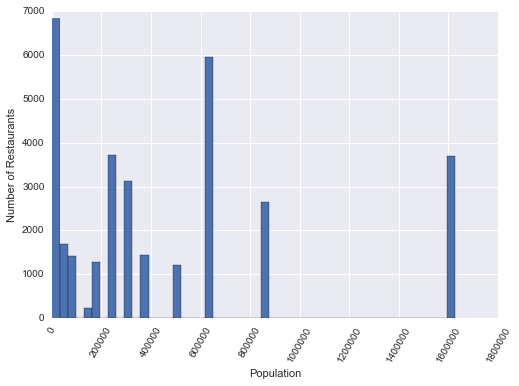

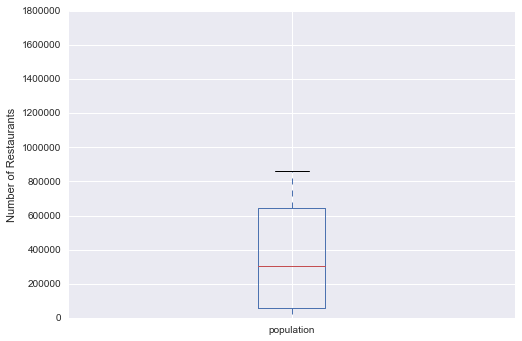

In [12]:
# population graph
food_business.population.plot.hist(by='business_id', bins=50)
_ = plt.xticks(rotation='60')
_ = plt.xlabel('Population')
_ = plt.ylabel('Number of Restaurants')
plt.show()
food_business.population.plot.box()
_ = plt.ylabel('Number of Restaurants')
plt.show()

From the numeric data and graphs above, there seems no correlation between the number of restaurants and the population.

## Do cities with more population have more reviews?

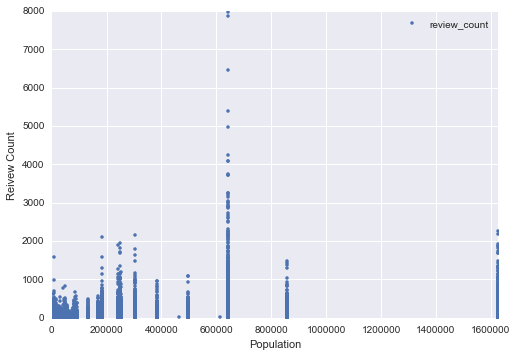

In [13]:
# Scatter plot with population and review count
_ = food_business.plot(x='population',y='review_count',marker='.',linestyle='none')
_ = plt.xlabel('Population')
_ = plt.ylabel('Reivew Count')
plt.show()

There seems no correlation between review count and population

## Is there relation between population and average of review count?

In [14]:
display(food_business.groupby('population').review_count.mean())

population
228          4.000000
364        144.500000
402        116.000000
408         10.888889
455          3.000000
465          4.000000
490         19.000000
502          3.500000
516          3.000000
562         43.454545
572         38.000000
575          6.000000
607         38.000000
618          3.000000
660         21.500000
757         12.333333
810          7.333333
848          7.700000
862        123.761905
865          3.000000
1000        30.000000
1019         5.545455
1048         6.000000
1083         8.000000
1104         5.000000
1120         8.000000
1133        35.733333
1136         7.000000
1153         5.000000
1166        13.000000
              ...    
48806       13.394737
49247       29.534722
50249       65.994681
53883       13.597701
56212       52.730061
63841       11.381818
68453       35.773810
76593       22.401015
79167       32.092437
79858       77.354497
84025       63.058824
87432       50.898876
92067       32.273649
134085      70.071429

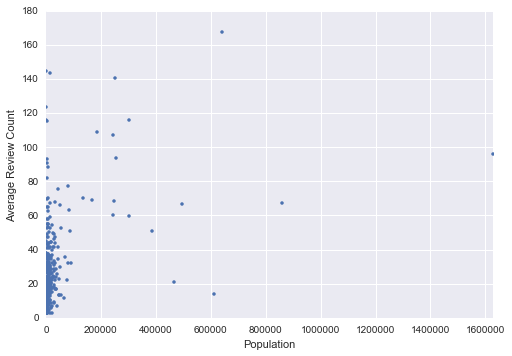

In [21]:
_ = food_business.groupby('population').mean()['review_count'].plot(marker='.',linestyle='none')
_ = plt.xlabel('Population')
_ = plt.ylabel('Average Review Count')
plt.show()

The graph shows no relation between average of revew count and population. In conclusion, more population doesn't neccessarily mean more reviews.

## What's the relation between average review count and state?

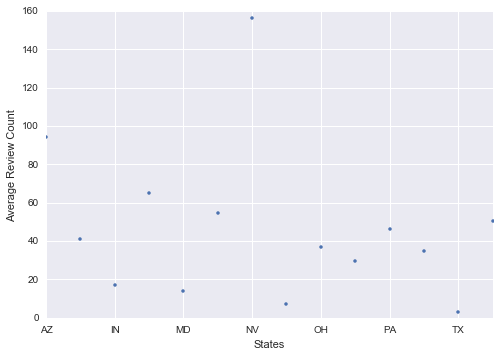

In [38]:
_ = food_business.groupby('state').mean()['review_count'].plot(marker='.',linestyle='none')
_ = plt.xlabel('States')
_ = plt.ylabel('Average Review Count')
plt.show()

In [33]:
display(food_business.groupby('state').mean()['review_count'])

state
AZ     94.134767
IL     41.105960
IN     17.071429
KY     65.000000
MD     14.000000
NC     54.519624
NV    156.121975
NY      7.000000
OH     36.658395
OR     29.863636
PA     46.459951
SC     35.058559
TX      3.000000
WI     50.618135
Name: review_count, dtype: float64